# TESTE


In [2]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma
import folium
from folium.plugins import HeatMap
from mpltools import color
import os 
import seaborn as sns;
import math;

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, viridis
from bokeh.plotting import figure
from bokeh.transform import factor_cmap


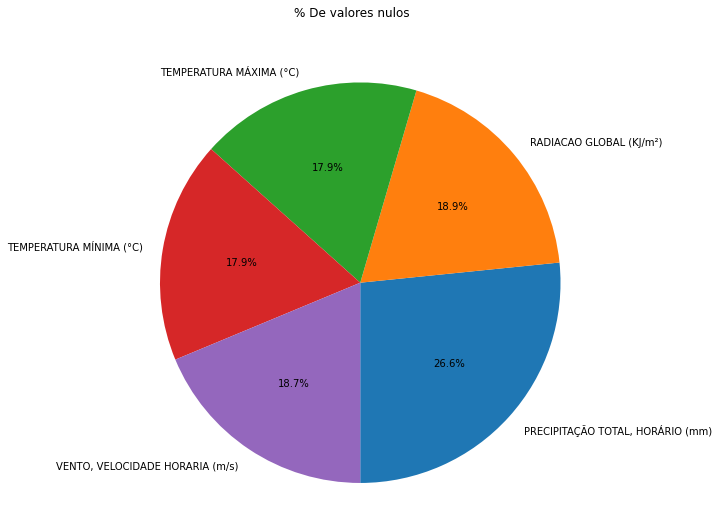

In [3]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dados = dfConsolidado.isnull().sum(); 

# matplotlib-exemplo-41
# grafico de pizza
datax = np.array([dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']])
labels = [ 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA MÁXIMA (°C)', 'TEMPERATURA MÍNIMA (°C)', 'VENTO, VELOCIDADE HORARIA (m/s)']
explode = ( 0, 0, 0, 0,0 )
colrs=['cyan', 'tan', 'wheat','green','blue' ]
# graficos
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(datax, explode=explode, labels=labels, autopct='%1.1f%%',startangle=270)
ax.axis('equal') # mantenha um circulo
fig.suptitle("% De valores nulos");
#fig.savefig('data/pizza.png', dpi=125)
 


In [4]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  
dados = dfConsolidado.isnull().sum(); 
 
dados = dfConsolidado.isnull().sum(); 
    
# cria a data
x_data = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)','RADIACAO GLOBAL (KJ/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)','VENTO, VELOCIDADE HORARIA (m/s)']
y_data = [dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']]

print(x_data)
print(y_data)

['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'VENTO, VELOCIDADE HORARIA (m/s)']
[12333, 8746, 8296, 8298, 8680]


In [5]:
from bokeh.palettes import magma, Category10                  # paleta de cores
 
dados = dfConsolidado.isnull().sum(); 
    
# cria a data
x_data = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)','RADIACAO GLOBAL (KJ/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)','VENTO, VELOCIDADE HORARIA (m/s)']
y_data = [dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']]

data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="% De valores nulos"
          )  # cria figura
p.vbar(x='x_data', 
       top='y_data', 
       width=0.9, 
       source=data, 
       legend_field="x_data",
       line_color='white',
       #fill_color=factor_cmap('x_data', palette=viridis(10), factors=x_data)  # cores
       #fill_color=factor_cmap('x_data', palette=magma(10), factors=x_data)
       #fill_color=factor_cmap('x_data', palette=Spectral6[10], factors=x_data)   # 6 cores
       fill_color=factor_cmap('x_data', palette=Category10[10], factors=x_data)
      )
#
#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
show(p)

In [7]:
estacoesConvencionais = pd.read_csv("datasets/CatalogoEstacoesConvencionais.csv",";");  
estacoesAutomaticas   = pd.read_csv("datasets/CatalogoEstacoesAutomáticas.csv",";");  


#print(estacaosConvencionais.groupby(['SG_ESTADO'],as_index=False).agg({'DT_INICIO_OPERACAO':'count'}))
#print(dadosFull.groupby(['NAME_FILE'],as_index=False).agg({'PRECIPITACAO':'sum'}))
 

In [10]:
#Somente dados do Centro Oeste - 2020
pd.set_option('display.precision',2);
path = "E://Mestrado Dados Climatologicos//Historicos//Processar"
file = "E://Mestrado Dados Climatologicos//Historicos//Consolidados//2020_CO.csv"

dataframeFull = pd.DataFrame();
contador =0;
totalFiles = 114;

for x in os.listdir(path): 
    if x.endswith(".CSV"):     
        #local = path+x
        #print(local)
        meteoro_df = pd.read_csv(path+'//'+x,";",encoding='latin-1',header =8, names=['DATA', 'PRECIPITACAO','RADIACAO_GLOBAL','TEMPERATURA_MAX','TEMPERATURA_MIN','UMIDADE_MAX','UMIDADE_MIN','VENTO_VELOCIDADE'],usecols=[0,2,6,9,10,13,14,18], decimal = "." )
        meteoro_df.replace({',': '.'}, regex=True, inplace=True) ;
        meteoro_df[['PRECIPITACAO','RADIACAO_GLOBAL','TEMPERATURA_MAX','TEMPERATURA_MIN','UMIDADE_MAX','UMIDADE_MIN','VENTO_VELOCIDADE']] = meteoro_df[['PRECIPITACAO','RADIACAO_GLOBAL','TEMPERATURA_MAX','TEMPERATURA_MIN','UMIDADE_MAX','UMIDADE_MIN','VENTO_VELOCIDADE']].astype(float);
        meteoro_df['NAME_FILE'] = x;
        dataframeFull = pd.concat([dataframeFull,meteoro_df]);
        contador = contador+1;
        #print( str(contador) +' de ' + str(totalFiles));
       
    
dataframeFull.to_csv(file,index=False,sep =';');
print('Processados um total de : ' + str(contador) + ' arquivos.');

#DadosFull contem somente dados do Centro Oeste - 2020
dadosFull = pd.read_csv(file,";");  
 

Processados um total de : 114 arquivos.
